In [1]:
import sys
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import PandasTools
import numpy as np

from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from matplotlib.cm import get_cmap
from collections import defaultdict
from xlwings import func, arg

In [2]:
# Data analysis libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("Set1")

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)

# Initiate plotly
init_notebook_mode(connected=True) #do not miss this line

In [3]:
# Load Data Base Ceta Number
cetane_raw = pd.read_csv('Base de datos Cetano Final.csv', encoding= 'unicode_escape')

# Best Practice: Make a copy of the raw data to work on
reviews = cetane_raw.copy()

# Peep it
reviews.head()

,No,SMILES,Name,Class,Formula,Molecular mass (g/mol),CN_literature,dnAB,C=C,c,...,SdssC,SssssCR,SdssCR,SaaO,SaaaC,Conjugated_double_bond,Mod_Louvain,Mod_Leiden,References,Set
0,9,CC(C)(C)c1ccccc1,tert-butylbenzene,Aromatic,C10H14,134.220,2.0,6,0,6,...,0,0,0,0,1,0,0.436945,0.352071,"Saldana et al., 2011; Dahmen and Marquardt, 20...",Test
1,13,CC(C)(C)c1ccc2ccccc2c1,2-tert-butylnaphthalene,Aromatic,C14H16,184.280,3.0,10,0,10,...,0,0,0,0,1,0,0.389060,0.402142,"Saldana et al., 2011; Dahmen and Marquardt, 20...",Test
2,26,CC(CC)C1=CC=CC=C1,(1-methylpropyl)-benzene,Aromatic,C10H14,134.212,6.0,6,0,6,...,0,0,0,0,1,0,0.426020,0.352071,"Runzhao Lia,1, Jose Martin Herrerosa,2, Athana...",Test
3,32,C1CCCC1,cyclopentane,cyclo-alkane,C5H10,70.130,6.1,0,0,0,...,0,0,0,0,0,0,0.109375,0.080000,"Saldana et al., 2011; Dahmen and Marquardt, 20...",Test
4,34,C(C)C1=CC=CC=C1,ethyl benzene,Aromatic,C8H10,106.160,6.3,6,0,6,...,0,0,0,0,1,0,0.368056,0.247934,"Runzhao Lia,1, Jose Martin Herrerosa,2, Athana...",Test


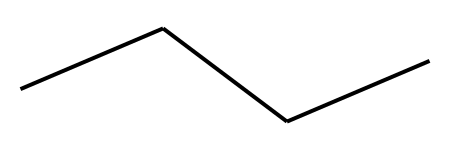

In [4]:
mol = Chem.MolFromSmiles('CCCC')
mol

In [5]:
smiles  = Chem.MolToSmiles(mol)
smiles

'CCCC'

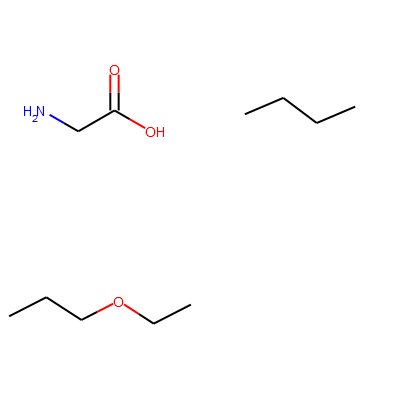

In [6]:
smiles_list = ['C(C(=O)O)N','CCCC','CCCOCC']

mol_list = []
for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    mol_list.append(mol)
    
img = Draw.MolsToGridImage(mol_list, molsPerRow = 2)    
img

In [7]:
pattern = Chem.MolFromSmiles('C(=O)O')

for mol in mol_list:
    print(mol.HasSubstructMatch(pattern))

True
False
False


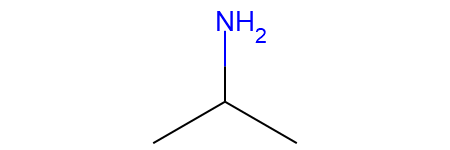

In [8]:
Chem.MolFromSmiles('CC(N)C')

In [9]:
pattern = Chem.MolFromSmarts('[r]')

for mol in mol_list:
    print(mol.HasSubstructMatch(pattern))

False
False
False


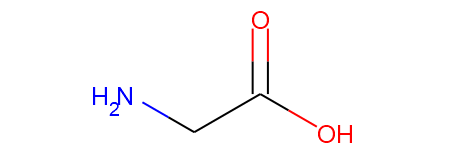

In [10]:
glycerine = mol_list[0]
glycerine

In [11]:
bi = {}

fp = AllChem.GetMorganFingerprintAsBitVect(glycerine, 2,nBits=1024, bitInfo = bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp,fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[27, 80, 147, 389, 650, 713, 807, 893, 966, 981]

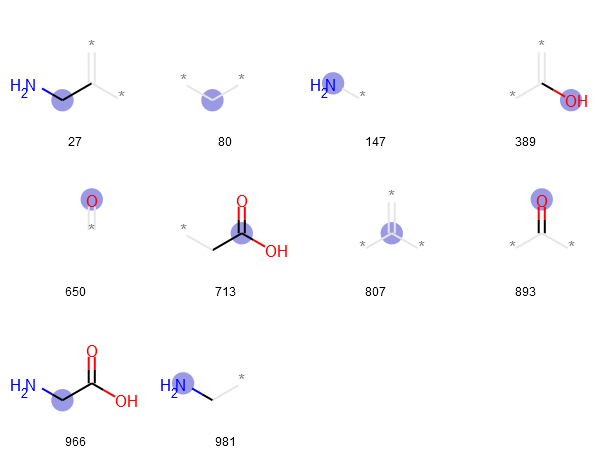

In [12]:
prints = [(glycerine, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow=4, legends=[str(x) for x in fp.GetOnBits()])

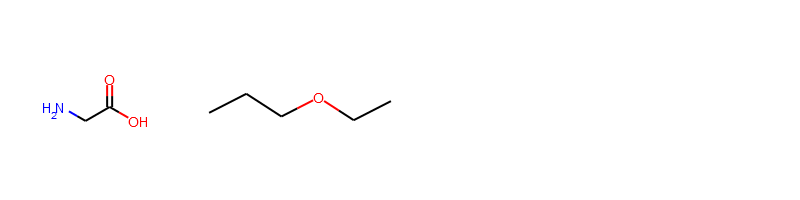

In [13]:
cysteine = mol_list[2]
img = Draw.MolsToGridImage([glycerine, cysteine], molsPerRow=4)
img

In [14]:
fp2 = AllChem.GetMorganFingerprintAsBitVect(cysteine, 2,nBits=1024, bitInfo = bi)
print('gly', list(fp.GetOnBits()))
print('cys', list(fp2.GetOnBits()))

common = set(fp2.GetOnBits()) & set(fp.GetOnBits())
combined = set(fp2.GetOnBits()) | set(fp.GetOnBits())
print(common)
print(combined)
print(len(common),len(combined), len(common)/len(combined))
print(DataStructs.TanimotoSimilarity(fp,fp2))

gly [27, 80, 147, 389, 650, 713, 807, 893, 966, 981]
cys [13, 33, 80, 163, 214, 294, 600, 695, 794, 870, 892, 968]
{80}
{389, 966, 968, 713, 650, 13, 80, 147, 981, 214, 600, 794, 27, 33, 163, 294, 870, 807, 695, 892, 893}
1 21 0.047619047619047616
0.047619047619047616


In [15]:
data = pd.read_csv('delaney-processed.csv')[['Compound ID', 'smiles','measured log solubility in mols per litre']]
print(list(data))
data.head()

['Compound ID', 'smiles', 'measured log solubility in mols per litre']


,Compound ID,smiles,measured log solubility in mols per litre
0,Amigdalin,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.77
1,Fenfuram,Cc1occc1C(=O)Nc2ccccc2,-3.30
2,citral,CC(C)=CCCC(C)=CC(=O),-2.06
3,Picene,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.87
4,Thiophene,c1ccsc1,-1.33


,Compound ID,smiles,measured log solubility in mols per litre,Molecule
0,Amigdalin,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.77,
1,Fenfuram,Cc1occc1C(=O)Nc2ccccc2,-3.30,
2,citral,CC(C)=CCCC(C)=CC(=O),-2.06,
3,Picene,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.87,
4,Thiophene,c1ccsc1,-1.33,

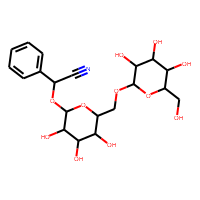
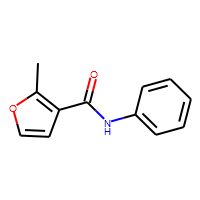
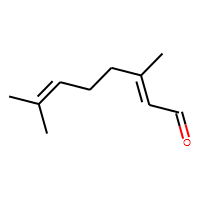
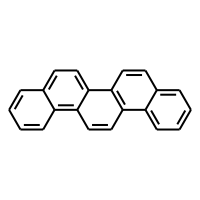
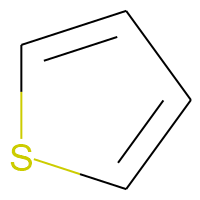

In [16]:
PandasTools.AddMoleculeColumnToFrame(data,'smiles','Molecule')
data.head()

,Compound ID,smiles,solub,Molecule
0,Amigdalin,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.77,
1,Fenfuram,Cc1occc1C(=O)Nc2ccccc2,-3.30,
2,citral,CC(C)=CCCC(C)=CC(=O),-2.06,
3,Picene,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.87,
4,Thiophene,c1ccsc1,-1.33,

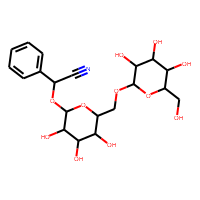
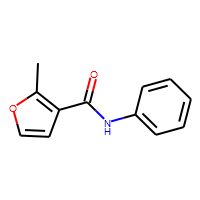
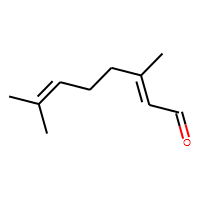
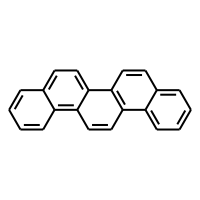
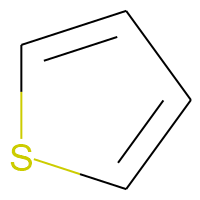

In [17]:
data=data.rename(columns={'measured log solubility in mols per litre':'solub'})
data.head()

,Compound ID,smiles,solub,Molecule
605,Acetamide,CC(=O)N,1.580,
146,Methanol,CO,1.570,
201,Methyl hydrazine,CNN,1.340,
1064,vamidothion,CNC(=O)C(C)SCCSP(=O)(OC)(OC),1.144,
679,Glycerol,OCC(O)CO,1.120,

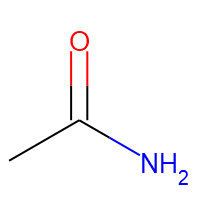
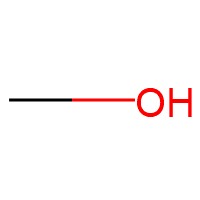
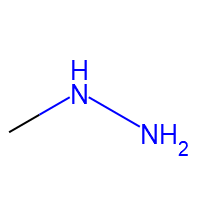
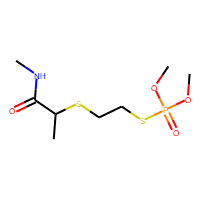
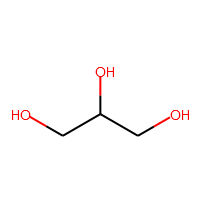

In [18]:
data.sort_values(by=['solub'], ascending=False).head()

In [19]:
data['solub'].max()

1.58

,Compound ID,smiles,solub,Molecule
605,Acetamide,CC(=O)N,1.580,
146,Methanol,CO,1.570,
201,Methyl hydrazine,CNN,1.340,
1064,vamidothion,CNC(=O)C(C)SCCSP(=O)(OC)(OC),1.144,
679,Glycerol,OCC(O)CO,1.120,

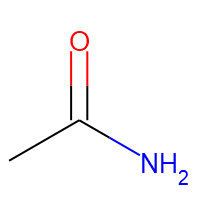
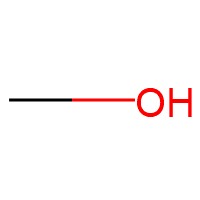
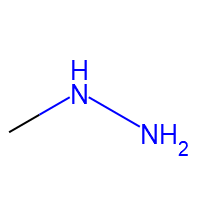
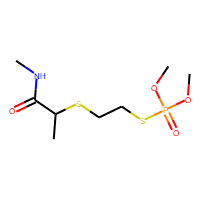
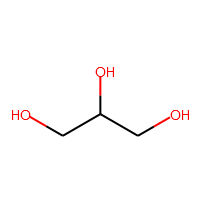

In [20]:
high_sol = data.loc[(data['solub'])>=1.0]
high_sol.sort_values(by=['solub'], ascending=False).head()

,Compound ID,smiles,solub,Molecule,mw
0,Amigdalin,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.77,,457.432
1,Fenfuram,Cc1occc1C(=O)Nc2ccccc2,-3.30,,201.225
2,citral,CC(C)=CCCC(C)=CC(=O),-2.06,,152.237
3,Picene,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.87,,278.354
4,Thiophene,c1ccsc1,-1.33,,84.143

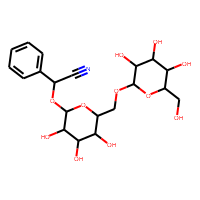
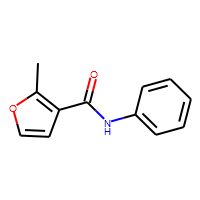
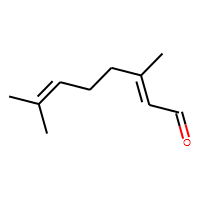
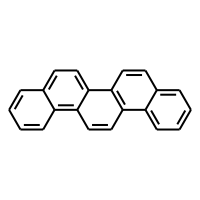
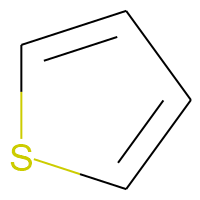

In [21]:
data['mw']=[Descriptors.MolWt(mol) for mol in data['Molecule']]
data.head()

In [22]:
smi = 'c1cc(F)ccc1Cl'
mol = Chem.MolFromSmiles(smi)
patt = Chem.MolFromSmarts('ClccccF')
hit_ats = list(mol.GetSubstructMatch(patt))
hit_bonds = []
for bond in patt.GetBonds():
    aid1 = hit_ats[bond.GetBeginAtomIdx()]
    aid2 = hit_ats[bond.GetEndAtomIdx()]
    hit_bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())
d = rdMolDraw2D.MolDraw2DCairo(500, 500) # or MolDraw2DCairo to get PNGs
rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats, highlightBonds=hit_bonds)

d.drawOptions().addAtomIndices = True
d.DrawMolecule(mol)
d.FinishDrawing()
with open('atom_annotation_2.png', 'wb') as f:   
    f.write(d.GetDrawingText())

In [23]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from matplotlib.cm import get_cmap
from collections import defaultdict
from xlwings import func, arg

In [24]:
SMILES = cetane_raw["SMILES"]
colors = get_cmap('tab20')


i = 0
for smi in SMILES:
    mol = Chem.MolFromSmiles(smi)
    
    for smart in ['C']:
        patt = Chem.MolFromSmarts(smart)
        hit_ats = list(mol.GetSubstructMatch(patt))
        

        hit_bonds = []
        for bond in patt.GetBonds():
            
            aid1 = hit_ats[bond.GetBeginAtomIdx()]
            aid2 = hit_ats[bond.GetEndAtomIdx()]            
            hit_bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())
            
            athighlights2[aid1].append(colors())
            athighlights2[aid2].append(colors())
            arads2[aid1] = 0.3
            arads2[aid2] = 0.3
            bndhighlights2[bid].append(colors())
            
        d = rdMolDraw2D.MolDraw2DCairo(500, 500) # or MolDraw2DCairo to get PNGs
        
        rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats, highlightBonds=hit_bonds)

        d.drawOptions().addAtomIndices = True
        d.DrawMolecule(mol)
        d.FinishDrawing()
        with open('atom_annotation_'+str(i)+'.png', 'wb') as f:   
            f.write(d.GetDrawingText())
                
    i+=1
    if i == 5:
        break

In [25]:
colours = [(0.8,0.0,0.8),(0.8,0.8,0),(0,0.8,0.8),(0,0,0.8)]
atom_cols = {}
for i, at in enumerate(hit_ats):
     atom_cols[at] = colours[i%4]
bond_cols = {}

for i, bd in enumerate(hit_bonds):
    print(i, bd)
    bond_cols[bd] = colours[3 - i%4]

d = rdMolDraw2D.MolDraw2DCairo(500, 500)
rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats,
                                   highlightAtomColors=atom_cols,
                                   highlightBonds=hit_bonds,
                                   highlightBondColors=bond_cols)

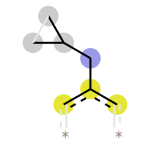

In [26]:
>>> mol = Chem.MolFromSmiles('c1ccccc1CC1CC1')
>>> bi = {}
>>> fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, bitInfo=bi)
>>> bi[872]
((6, 2),)
>>> mfp2_svg = Draw.DrawMorganBit(mol, 872, bi, useSVG=True)
>>> rdkbi = {}
>>> rdkfp = Chem.RDKFingerprint(mol, maxPath=5, bitInfo=rdkbi)
>>> rdkbi[1553]
[[0, 1, 9, 5, 4], [2, 3, 4, 9, 5]]
>>> rdk_svg = Draw.DrawRDKitBit(mol, 1553, rdkbi, useSVG=True)
rdk_svg
mfp2_svg

In [27]:
from rdkit import Chem
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG, Image
IPythonConsole.molSize = (400,400)

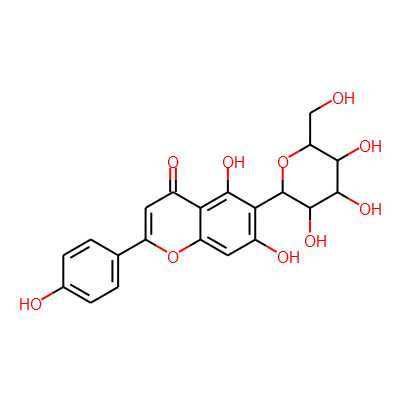

In [28]:
que_smiles = "O=c1cc(-c2ccc(O)cc2)oc2cc(O)c(C3OC(CO)C(O)C(O)C3O)c(O)c12"
que_mol = Chem.MolFromSmiles(que_smiles)
rdDepictor.Compute2DCoords(que_mol)
que_mol

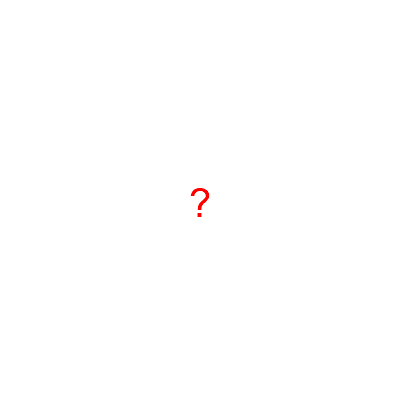

In [29]:
mcs_smarts_1 = "[#8]-[#6]1:[#6](:[#6]:[#6](:[#6]:[#6]:1):[#6](=[#8]):[#6]:[#6](:[#8])-[#6])-[#6]1-[#8]-[#6](-[#6]-[#8])-[#6](-[#6](-[#6]-1-[#8])-[#8])-[#8]"
mcs_mol_1 = Chem.MolFromSmarts(mcs_smarts_1)
rdDepictor.Compute2DCoords(mcs_mol_1)
mcs_mol_1

mcs_smarts_2 = "[OX2H;!$(OC=[OX1])]"
mcs_mol_2 = Chem.MolFromSmarts(mcs_smarts_2)
rdDepictor.Compute2DCoords(mcs_mol_2)
mcs_mol_2
# note ring opened at O-C bond to the phenyl ring

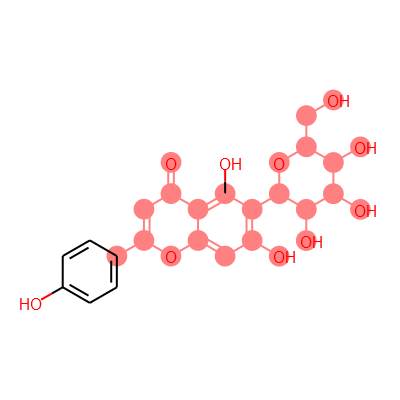

In [30]:
que_mc = Chem.Mol(que_mol.ToBinary())  # make a copy of the Mol object
que_mc.GetSubstructMatch(mcs_mol_1)
que_mc

# note that this incorrectly highlights what should be the open O-C bond

In [31]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
import rdkit
rdkit.__version__

'2020.03.2'

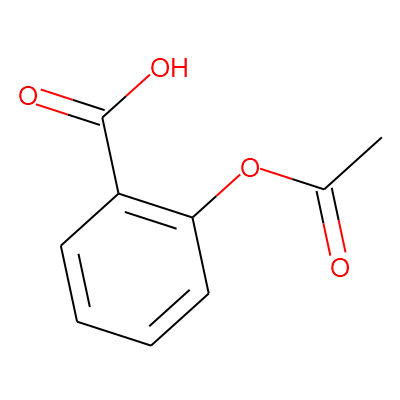

In [32]:
m = Chem.MolFromSmiles('c1cc(C(=O)O)c(OC(=O)C)cc1')
m

((8, 9, 7, 6),)


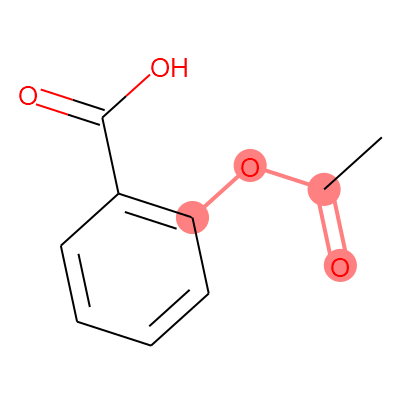

In [33]:
print(m.GetSubstructMatches(Chem.MolFromSmarts('[CX3;$([R0][#6]),$([H1R0])](=[OX1])[OX2][#6;!$(C=[O,N,S])]')))
m

In [34]:
def draw_moleculesfg(SMILE, SMART):

    #SMILE
    #SMILE = 'c1cc(C(=O)O)c(OC(=O)C)cc1'
    m = Chem.MolFromSmiles(SMILE)

    #Patron a buscar
    #SMART = '[CX3;$([H2]),$([H1][#6]),$(C([#6])[#6])]=[CX3;$([H2]),$([H1][#6]),$(C([#6])[#6])]'
    pattern = m.GetSubstructMatches(Chem.MolFromSmarts(SMART))


    #Color que se le asignara al patron que deseamos buscar
    colors = [(0.99215686274509807, 0.70588235294117652, 0.3843137254901961)]

    #Necesitamos convertir la tupla a una lista pattern a atm
    atm = np.asarray(pattern).reshape(-1)

    #Creamos una lista donde almacene el color de los patrones encontrados
    athighlights = defaultdict(list)
    arads = {}

    #Ahora debemos crear un diccionario que almacene el id con el color que deseamos asignar
    i = 0
    for aid in atm:
        i+=1
        aid = aid.item()
        athighlights[aid].append(colors[0])
        arads[aid] = 0.4

    atms_list = list(athighlights.keys())  
    print(atms_list)    

    molatms=list(m.GetAtoms())    
    bndhighlights = defaultdict(list)
    #Ahora debemos crear un diccionario que almacene el id de los enlaces
    i=0
    for bond in m.GetBonds():
        i+=1
        beginid=bond.GetBeginAtomIdx()
        endid=bond.GetEndAtomIdx()
        aid1=molatms[beginid].GetIdx()
        aid2=molatms[endid].GetIdx()            

        if (aid1 and aid2) in atms_list:
            bid = m.GetBondBetweenAtoms(beginid,endid).GetIdx()    
            bndhighlights[bid].append(colors[0])

    d2d = rdMolDraw2D.MolDraw2DSVG(400,400)
    d2d.DrawMoleculeWithHighlights(m,'molécula',dict(athighlights),dict(bndhighlights),arads,{})

    d2d.FinishDrawing()

    fig = SVG(d2d.GetDrawingText())
    return fig    

[4, 9, 14, 15]
[1, 5, 6, 10, 11]


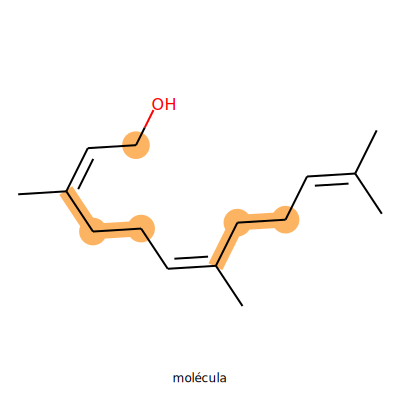

In [35]:
#SMILE = 'c1cc(C(=O)O)c(OC(=O)C)cc1'
SMILE = 'OCC=C(C)CCC=C(C)CCC=C(C)C'
#SMART = '[CX3;$([H2]),$([H1][#6]),$(C([#6])[#6])]=[CX3;$([H2]),$([H1][#6]),$(C([#6])[#6])]'
SMART = ['[C;H3]','[C;H2]']
for i in SMART:
    j = draw_moleculesfg(SMILE, i)

j

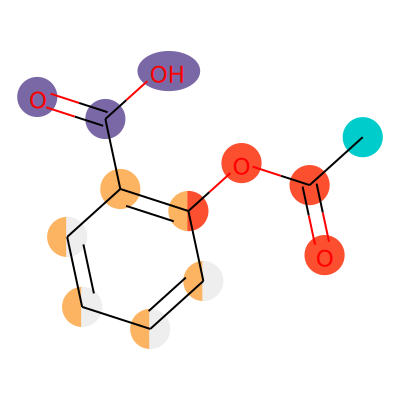

In [36]:
#SMILE
SMILE = 'c1cc(C(=O)O)c(OC(=O)C)cc1'
m = Chem.MolFromSmiles(SMILE)

#Patron a buscar
SMART = ['a', '[CX3;$([H2]),$([H1][#6]),$(C([#6])[#6])]=[CX3;$([H2]),$([H1][#6]),$(C([#6])[#6])]', '[CX4]([#6])([#6])([#6])[#6]', '[C;H3]', '*[CH2;!R]*','[OX2H;!$(OC=[OX1])]', '[OX2H0R0&!$(OC(=O))]', '[oX2H0R,OX2H0R&!$(OC(=O))]', '[c,C][C](=O)[C&!R]', '[#6;R][CX3](=[OX1])[#6;R]', '[#6]-[CH1]=O', '[CX3;$([R0][#6]),$([H1R0])](=[OX1])[OX2][#6;!$(C=[O,N,S])]', '[CX4H1!R]', '[CHR0&$(C=C)]', '[cH,CHR&$(C=C)]', '[CX3H2&$(C=C)]', '[CX4H1R]', '*[CH2;R]*', '[OX2H][CX4H2;!$(C([OX2H])[O,S,#7,#15])]', '[OX2H][CX4H;!$(C([OX2H])[O,S,#7,#15])]', '[OX2H][CX4D4;!$(C([OX2H])[O,S,#7,#15])]', '[OX2H1][c]', '[CX3;$([R0][#6]),$([H1R0])](=[OX1])[$([OX2H]),$([OX1-])]']

#Color que se le asignara al patron que deseamos buscar
colors = [(0.99215686274509807, 0.70588235294117652, 0.3843137254901961),(0.8,0.0,0.8),(0.8,0.8,0.8),(0,0.8,0.8),(0.50588235294117645, 0.69411764705882351, 0.82352941176470584),[(0.99215686274509807, 0.70588235294117652, 0.3843137254901961),(0.8,0.0,0.8),(0.8,0.8,0.8),(0,0.8,0.8),(0.50588235294117645, 0.69411764705882351, 0.82352941176470584)],(0.88627450980392153, 0.29019607843137257, 0.20000000000000001),(0.0, 0.44705882352941179, 0.69803921568627447),(0.94117647058823528, 0.94117647058823528, 0.94117647058823528),(0.40000000000000002, 0.40000000000000002, 0.40000000000000002),(0.0, 0.0, 1.0),
         (0.9882352941176471, 0.30980392156862746, 0.18823529411764706), (0.74901960784313726, 0.73333333333333328, 0.85098039215686272), (0.80000000000000004, 0.92156862745098034, 0.7686274509803922), (0.93333333333333335, 0.93333333333333335, 0.93333333333333335), (0.65098039215686276, 0.023529411764705882, 0.15686274509803921), (0.59607843137254901, 0.55686274509803924, 0.83529411764705885), (0.46666666666666667, 0.46666666666666667, 0.46666666666666667), (0.99215686274509807, 0.70588235294117652, 0.3843137254901961), (1.0, 0.70980392156862748, 0.72156862745098038), (0.18823529411764706, 0.63529411764705879, 0.85490196078431369), 
         (0.93333333333333335, 0.93333333333333335, 0.93333333333333335), (0.47843137254901963, 0.40784313725490196, 0.65098039215686276), (0.54509803921568623, 0.54509803921568623, 0.54509803921568623), (0.89803921568627454, 0.68235294117647061, 0.2196078431372549)]

#Creamos una lista donde almacene el color de los átomos 
athighlights = defaultdict(list)
arads = {}

#Creamos una lista donde almacene el color de los enlaces
molatms=list(m.GetAtoms())    
bndhighlights = defaultdict(list)

col = -1
for i in SMART:
    col += 1
    pattern = m.GetSubstructMatches(Chem.MolFromSmarts(i))

    #Necesitamos convertir la tupla a una lista pattern a atm
    atm = np.asarray(pattern).reshape(-1)

    #Ahora debemos crear un diccionario que almacene el id con el color que deseamos asignar
    i = 0
    for aid in atm:
        i+=1
        aid = aid.item()
        athighlights[aid].append(colors[col])
        arads[aid] = 0.4
        #print(aid)
    
    #Creamos una lista de atomos
    #atms_list = list(athighlights.keys())  
    
    #Ahora debemos crear un diccionario que almacene el id de los enlaces
    i=0
    for bond in m.GetBonds():
        i+=1
        beginid=bond.GetBeginAtomIdx()
        endid=bond.GetEndAtomIdx()
                
        #bid = m.GetBondBetweenAtoms(beginid,endid).GetIdx()    
        #bndhighlights[bid].append(colors[col])
            
        
d2d = rdMolDraw2D.MolDraw2DSVG(400,400)
d2d.DrawMoleculeWithHighlights(m,'',dict(athighlights),dict(bndhighlights),arads,{})

d2d.FinishDrawing()

fig = SVG(d2d.GetDrawingText())
fig

In [37]:
macedonia = {'plátano':'amarillo', 'fresa':'roja'}

for a,q in macedonia.items():
    print(a,q)

plátano amarillo
fresa roja


In [38]:
SMART = ['a', '[CX3;$([H2]),$([H1][#6]),$(C([#6])[#6])]=[CX3;$([H2]),$([H1][#6]),$(C([#6])[#6])]', '[CX4]([#6])([#6])([#6])[#6]', '[C;H3]', '*[CH2;!R]*','[OX2H;!$(OC=[OX1])]', '[OX2H0R0&!$(OC(=O))]', '[oX2H0R,OX2H0R&!$(OC(=O))]', '[c,C][C](=O)[C&!R]', '[#6;R][CX3](=[OX1])[#6;R]', '[#6]-[CH1]=O', '[CX3;$([R0][#6]),$([H1R0])](=[OX1])[OX2][#6;!$(C=[O,N,S])]', '[CX4H1!R]', '[CHR0&$(C=C)]', '[cH,CHR&$(C=C)]', '[CX3H2&$(C=C)]', '[CX4H1R]', '*[CH2;R]*', '[OX2H][CX4H2;!$(C([OX2H])[O,S,#7,#15])]', '[OX2H][CX4H;!$(C([OX2H])[O,S,#7,#15])]', '[OX2H][CX4D4;!$(C([OX2H])[O,S,#7,#15])]', '[OX2H1][c]', '[CX3;$([R0][#6]),$([H1R0])](=[OX1])[$([OX2H]),$([OX1-])]']
colors = [(0.99215686274509807, 0.70588235294117652, 0.3843137254901961),(0.8,0.0,0.8),(0.8,0.8,0.8),(0,0.8,0.8),(0.50588235294117645, 0.69411764705882351, 0.82352941176470584),[(0.99215686274509807, 0.70588235294117652, 0.3843137254901961),(0.8,0.0,0.8),(0.8,0.8,0.8),(0,0.8,0.8),(0.50588235294117645, 0.69411764705882351, 0.82352941176470584)],(0.88627450980392153, 0.29019607843137257, 0.20000000000000001),(0.0, 0.44705882352941179, 0.69803921568627447),(0.94117647058823528, 0.94117647058823528, 0.94117647058823528),(0.40000000000000002, 0.40000000000000002, 0.40000000000000002),(0.0, 0.0, 1.0),
         (0.9882352941176471, 0.30980392156862746, 0.18823529411764706), (0.74901960784313726, 0.73333333333333328, 0.85098039215686272), (0.80000000000000004, 0.92156862745098034, 0.7686274509803922), (0.93333333333333335, 0.93333333333333335, 0.93333333333333335), (0.65098039215686276, 0.023529411764705882, 0.15686274509803921), (0.59607843137254901, 0.55686274509803924, 0.83529411764705885), (0.46666666666666667, 0.46666666666666667, 0.46666666666666667), (0.99215686274509807, 0.70588235294117652, 0.3843137254901961), (1.0, 0.70980392156862748, 0.72156862745098038), (0.18823529411764706, 0.63529411764705879, 0.85490196078431369), 
         (0.93333333333333335, 0.93333333333333335, 0.93333333333333335), (0.47843137254901963, 0.40784313725490196, 0.65098039215686276), (0.54509803921568623, 0.54509803921568623, 0.54509803921568623), (0.89803921568627454, 0.68235294117647061, 0.2196078431372549)]

print(len(colors))

25


In [39]:
#20
SMART = ['a', '[CX3;$([H2]),$([H1][#6]),$(C([#6])[#6])]=[CX3;$([H2]),$([H1][#6]),$(C([#6])[#6])]', '[CX4]([#6])([#6])([#6])[#6]', '[C;H3]', '*[CH2;!R]*','[OX2H;!$(OC=[OX1])]', '[OX2H0R0&!$(OC(=O))]', '[oX2H0R,OX2H0R&!$(OC(=O))]', '[c,C][C](=O)[C&!R]', '[#6]-[CH1]=O', '[CX3;$([R0][#6]),$([H1R0])](=[OX1])[OX2][#6;!$(C=[O,N,S])]', '[CX4H1!R]', '[CHR0&$(C=C)]', '[cH,CHR&$(C=C)]', '[CX4H1R]', '*[CH2;R]*', '[OX2H][CX4H2;!$(C([OX2H])[O,S,#7,#15])]', '[OX2H][CX4H;!$(C([OX2H])[O,S,#7,#15])]', '[OX2H][CX4D4;!$(C([OX2H])[O,S,#7,#15])]', '[OX2H1][c]', '[CX3;$([R0][#6]),$([H1R0])](=[OX1])[$([OX2H]),$([OX1-])]']
colors = [(0.99215686274509807, 0.70588235294117652, 0.3843137254901961),(0.8,0.0,0.8),(0.8,0.8,0.8),(0,0.8,0.8),(0.50588235294117645, 0.69411764705882351, 0.82352941176470584),[(0.99215686274509807, 0.70588235294117652, 0.3843137254901961),(0.8,0.0,0.8),(0.8,0.8,0.8),(0,0.8,0.8),(0.50588235294117645, 0.69411764705882351, 0.82352941176470584)],(0.88627450980392153, 0.29019607843137257, 0.20000000000000001),(0.0, 0.44705882352941179, 0.69803921568627447),(0.94117647058823528, 0.94117647058823528, 0.94117647058823528),(0.40000000000000002, 0.40000000000000002, 0.40000000000000002),(0.0, 0.0, 1.0),
         (0.9882352941176471, 0.30980392156862746, 0.18823529411764706), (0.74901960784313726, 0.73333333333333328, 0.85098039215686272), (0.80000000000000004, 0.92156862745098034, 0.7686274509803922), (0.93333333333333335, 0.93333333333333335, 0.93333333333333335), (0.65098039215686276, 0.023529411764705882, 0.15686274509803921), (0.59607843137254901, 0.55686274509803924, 0.83529411764705885), (0.46666666666666667, 0.46666666666666667, 0.46666666666666667), (0.99215686274509807, 0.70588235294117652, 0.3843137254901961), (1.0, 0.70980392156862748, 0.72156862745098038), (0.18823529411764706, 0.63529411764705879, 0.85490196078431369), 
         (0.93333333333333335, 0.93333333333333335, 0.93333333333333335), (0.47843137254901963, 0.40784313725490196, 0.65098039215686276), (0.54509803921568623, 0.54509803921568623, 0.54509803921568623), (0.89803921568627454, 0.68235294117647061, 0.2196078431372549)]

print(len(SMART))

21


0 val_2= 0 val_1= 0 0 0


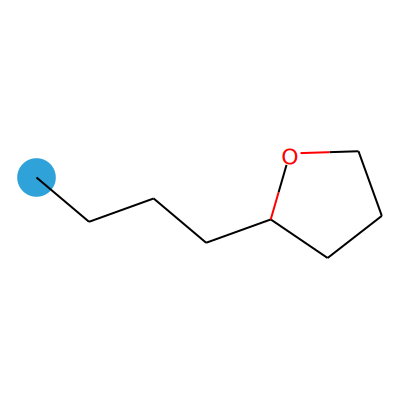

In [58]:
##CODIGO FG COLOR

#SMILE
#SMILE = 'OCC=C(C)CCC=C(C)CCC=C(C)C'
SMILE = 'CCCCC1CCCO1'
m = Chem.MolFromSmiles(SMILE)

#Patron a buscar
#SMART = ['[CH3;!R]','[CX3;$([H2]),$([H1][#6]),$(C([#6])[#6])]=[CX3;$([H2]),$([H1][#6]),$(C([#6])[#6])]','[OX2H;!$(OC=[OX1])]','[CH2;!R]','[#6]-[CH1]=O']
SMART = ['[CH3;!R]']


#Color que se le asignara al patron que deseamos buscar
colors = [(0.18823529411764706, 0.63529411764705879, 0.85490196078431369),(0.18823529411764706, 0.63529411764705879, 0.85490196078431369),(1,1,1),(0.18823529411764706, 0.63529411764705879, 0.85490196078431369),(1.0, 0.70980392156862748, 0.72156862745098038), (0.18823529411764706, 0.63529411764705879, 0.85490196078431369),(0.8,0.8,0.8),(0,0.8,0.8), (1.0, 0.70980392156862748, 0.72156862745098038)]

#Creamos una lista donde almacene el color de los átomos 
athighlights = defaultdict(list)
arads = {}

#Creamos una lista donde almacene el color de los enlaces
molatms=list(m.GetAtoms())    
bndhighlights = defaultdict(list)

#Creamos un diccionario donde almacenaremos el id de los enlaces
id_enlace = {}

col = -1
for i in SMART:
    col += 1
    pattern = m.GetSubstructMatches(Chem.MolFromSmarts(i))

    #Necesitamos convertir la tupla a una lista pattern a atm
    atm = np.asarray(pattern).reshape(-1)
    
    #Ahora debemos crear un diccionario que almacene el id con el color que deseamos asignar
    for aid in atm:
        aid = aid.item()
        athighlights[aid].append(colors[col])
        arads[aid] = 0.4
        
        id_enlace[aid] = col
        

for val_1,key_1 in id_enlace.items():
    #print(val_1, key_1,'1')
    for val_2, key_2 in id_enlace.items():
        #print(val_2, key_2, '2')
        #print('')
        check = abs(val_2-val_1)
        print(check, "val_2=",val_2,"val_1=",val_1,key_1,key_2)
        if (check == 1 and key_2 == key_1):
            print('Ya quedo')
            #print(val_1,val_2,key_1,key_2)
            try:
                m.GetBondBetweenAtoms(val_2,val_1).GetIdx()
                bid = m.GetBondBetweenAtoms(val_2,val_1).GetIdx()
                bndhighlights[bid].append(colors[key_2])
                
            except:
                pass
                #print("There is no such attribute")
        elif (check == val_1 and key_2 == key_1):
            try:
                m.GetBondBetweenAtoms(val_2,val_1).GetIdx()
                bid = m.GetBondBetweenAtoms(val_2,val_1).GetIdx()
                bndhighlights[bid].append(colors[key_2])
            except:
                pass

d2d = rdMolDraw2D.MolDraw2DSVG(400,400)
d2d.DrawMoleculeWithHighlights(m,"",dict(athighlights),dict(bndhighlights),arads,{})

d2d.FinishDrawing()

fig = SVG(d2d.GetDrawingText())
fig

()


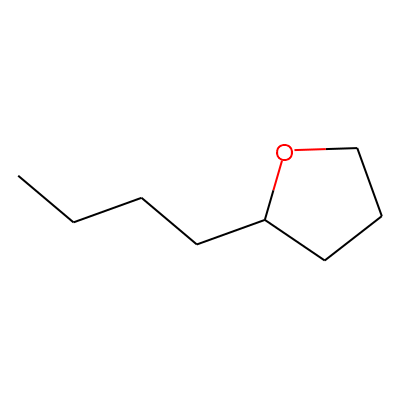

In [41]:
patterns = list(['[CX3;$([R0][#6]),$([H1R0])](=[OX1])[OX2][#6;!$(C=[O,N,S])]','[C;H3]'])


#for i in patterns:
#    m = Chem.MolFromSmiles(i)

    
    
print(m.GetSubstructMatches(Chem.MolFromSmarts('[CX3;$([R0][#6]),$([H1R0])](=[OX1])[OX2][#6;!$(C=[O,N,S])]')))
m

30
32
11
10
2
1
5
6
8
9
31
4
13
15
27
29
32
12
18
21
23
25
33
17


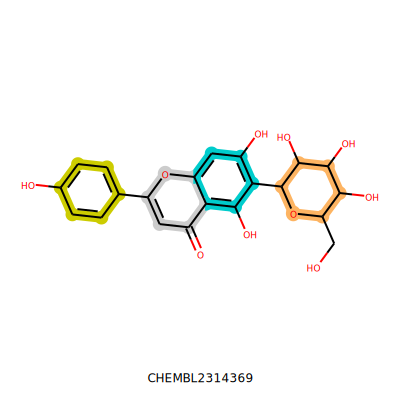

In [42]:
chembl2314369=Chem.MolFromSmiles('O=c1cc(-c2ccc(O)cc2)oc2cc(O)c(C3OC(CO)C(O)C(O)C3O)c(O)c12')
rings = chembl2314369.GetRingInfo()

colors = [(0.8,0.8,0.8),(0.8,0.8,0),(0,0.8,0.8),(0.99215686274509807, 0.70588235294117652, 0.3843137254901961)]

athighlights = defaultdict(list)
arads = {}

for i,rng in enumerate(rings.AtomRings()):
    for aid in rng:
        athighlights[aid].append(colors[i])
        arads[aid] = 0.3        
    
bndhighlights = defaultdict(list)
for i,rng in enumerate(rings.BondRings()):
    for bid in rng:
        print(bid)
        bndhighlights[bid].append(colors[i])

    
d2d = rdMolDraw2D.MolDraw2DSVG(400,400)
d2d.DrawMoleculeWithHighlights(chembl2314369,'CHEMBL2314369',dict(athighlights),dict(bndhighlights),arads,{})

d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

In [43]:
chembl2314369=Chem.MolFromSmiles('N#CC(C#N)=C1C(=O)c2cccc3cccc1c23')
rings = chembl2314369.GetRingInfo()
print(rings)

In [44]:
hit_ats

[0]

,No,SMILES,Name,Class,Formula,Molecular mass (g/mol),CN_literature,dnAB,C=C,c,...,SssssCR,SdssCR,SaaO,SaaaC,Conjugated_double_bond,Mod_Louvain,Mod_Leiden,References,Set,Molecule
0,9,CC(C)(C)c1ccccc1,tert-butylbenzene,Aromatic,C10H14,134.220,2.0,6,0,6,...,0,0,0,1,0,0.436945,0.352071,"Saldana et al., 2011; Dahmen and Marquardt, 20...",Test,
1,13,CC(C)(C)c1ccc2ccccc2c1,2-tert-butylnaphthalene,Aromatic,C14H16,184.280,3.0,10,0,10,...,0,0,0,1,0,0.389060,0.402142,"Saldana et al., 2011; Dahmen and Marquardt, 20...",Test,
2,26,CC(CC)C1=CC=CC=C1,(1-methylpropyl)-benzene,Aromatic,C10H14,134.212,6.0,6,0,6,...,0,0,0,1,0,0.426020,0.352071,"Runzhao Lia,1, Jose Martin Herrerosa,2, Athana...",Test,
3,32,C1CCCC1,cyclopentane,cyclo-alkane,C5H10,70.130,6.1,0,0,0,...,0,0,0,0,0,0.109375,0.080000,"Saldana et al., 2011; Dahmen and Marquardt, 20...",Test,
4,34,C(C)C1=CC=CC=C1,ethyl benzene,Aromatic,C8H10,106.160,6.3,6,0,6,...,0,0,0,1,0,0.368056,0.247934,"Runzhao Lia,1, Jose Martin Herrerosa,2, Athana...",Test,

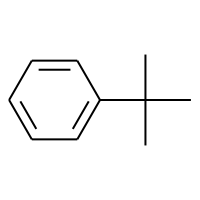
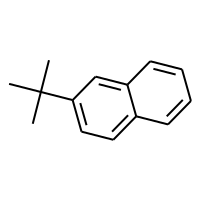
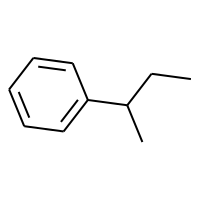
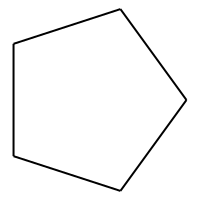
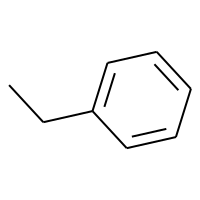

In [45]:
PandasTools.AddMoleculeColumnToFrame(cetane_raw,'SMILES','Molecule')
cetane_raw.head()

,No,SMILES,Name,Class,Formula,Molecular mass (g/mol),CN_literature,dnAB,C=C,c,...,SssssCR,SdssCR,SaaO,SaaaC,Conjugated_double_bond,Mod_Louvain,Mod_Leiden,References,Set,Molecule
0,9,CC(C)(C)c1ccccc1,tert-butylbenzene,Aromatic,C10H14,134.220,2.0,6,0,6,...,0,0,0,1,0,0.436945,0.352071,"Saldana et al., 2011; Dahmen and Marquardt, 20...",Test,
1,13,CC(C)(C)c1ccc2ccccc2c1,2-tert-butylnaphthalene,Aromatic,C14H16,184.280,3.0,10,0,10,...,0,0,0,1,0,0.389060,0.402142,"Saldana et al., 2011; Dahmen and Marquardt, 20...",Test,
2,26,CC(CC)C1=CC=CC=C1,(1-methylpropyl)-benzene,Aromatic,C10H14,134.212,6.0,6,0,6,...,0,0,0,1,0,0.426020,0.352071,"Runzhao Lia,1, Jose Martin Herrerosa,2, Athana...",Test,
3,32,C1CCCC1,cyclopentane,cyclo-alkane,C5H10,70.130,6.1,0,0,0,...,0,0,0,0,0,0.109375,0.080000,"Saldana et al., 2011; Dahmen and Marquardt, 20...",Test,
4,34,C(C)C1=CC=CC=C1,ethyl benzene,Aromatic,C8H10,106.160,6.3,6,0,6,...,0,0,0,1,0,0.368056,0.247934,"Runzhao Lia,1, Jose Martin Herrerosa,2, Athana...",Test,

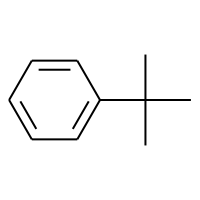
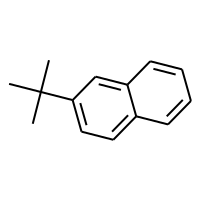
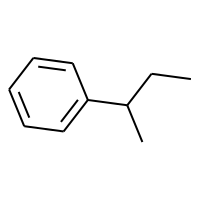
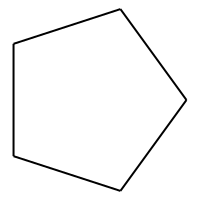
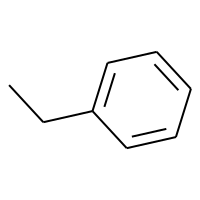

In [46]:
#cetane_raw = cetane_raw.drop(columns={'No',SdssC','SssssCR','SdssCR','SaaO','SaaaC'})
#cetane_raw = cetane_raw.drop(columns={'dnOHsec','dnOHter','phenol','Carboxylic_acid'})
#cetane_raw = cetane_raw.drop(columns={'g_CH2db_linear','dnOHprim'})
cetane_raw = cetane_raw.drop(columns={'g_CHdb_linear','g_CHdb_ring','g_CH2_ring'})
cetane_raw.head()

In [47]:
# Load Data Base Ceta Number
cetane_analisis = pd.read_excel('analisis de resultados.xlsm', encoding= 'unicode_escape')

# Best Practice: Make a copy of the raw data to work on
cetane_data = cetane_analisis.copy()

cetane_data.head()

,No,SMILES,Name,Class,Formula,Molecular mass (g/mol),CN_literature,dnAB,C=C,c,...,dnOHsec,dnOHter,-OH (Phenol),Carboxylic acid,Mod Louvain,Mod Leiden,References,Set,CN_Predicted,Error
0,9,CC(C)(C)c1ccccc1,tert-butylbenzene,Aromatic,C10H14,134.220,2.0,6,0,6,...,0,0,0,0,0.436945,0.352071,"Saldana et al., 2011; Dahmen and Marquardt, 20...",Test,9.700218,-7.700218
1,13,CC(C)(C)c1ccc2ccccc2c1,2-tert-butylnaphthalene,Aromatic,C14H16,184.280,3.0,10,0,10,...,0,0,0,0,0.389060,0.402142,"Saldana et al., 2011; Dahmen and Marquardt, 20...",Test,1.291487,1.708513
2,26,CC(CC)C1=CC=CC=C1,(1-methylpropyl)-benzene,Aromatic,C10H14,134.212,6.0,6,0,6,...,0,0,0,0,0.426020,0.352071,"Runzhao Lia,1, Jose Martin Herrerosa,2, Athana...",Test,8.923341,-2.923341
3,32,C1CCCC1,cyclopentane,cyclo-alkane,C5H10,70.130,6.1,0,0,0,...,0,0,0,0,0.109375,0.080000,"Saldana et al., 2011; Dahmen and Marquardt, 20...",Test,14.223439,-8.123439
4,34,C(C)C1=CC=CC=C1,ethyl benzene,Aromatic,C8H10,106.160,6.3,6,0,6,...,0,0,0,0,0.368056,0.247934,"Runzhao Lia,1, Jose Martin Herrerosa,2, Athana...",Test,10.473450,-4.173450


In [48]:
#Table errors without Molecule
data_error = cetane_data[["SMILES","Name","CN_literature","CN_Predicted","Mod Leiden","Error"]]

#Table errror with molecule 
PandasTools.AddMoleculeColumnToFrame(data_error,'SMILES','Molecule')

#Show table
table_error = data_error.sample(20)

,SMILES,Name,CN_literature,CN_Predicted,Mod Leiden,Error,Molecule
239,CC1(C(C1)C)C,"1,1,2-trimethylcyclopropane",17.00,37.471041,0.166667,-20.471041,
225,CC(C)c1ccccc1,isopropylbenzene,15.00,5.864828,0.288194,9.135172,
681,CC(C)C=O,isobutanal(isobutyraldehyde),21.10,33.706437,0.300000,-12.606437,
255,CC(C)CCO,isopentanol,18.40,13.153909,0.300000,5.246091,
505,C(C(C)C)C1CCCC1,iso-butylcyclopentane,47.80,44.126421,0.327160,3.673579,
201,CC(C)(CCO)OC,3-methoxy-3-methyl-1-butanol,10.00,9.659407,0.357143,0.340593,
577,CCCCCCCC,n-octane,64.00,63.383131,0.357143,0.616869,
461,CCCCC/C=C/C,(2e)-oct-2-ene,43.00,44.733813,0.398438,-1.733813,
371,CC1CCOC(C1)C=C(C)C,rose oxide,30.00,25.898378,0.406250,4.101622,
445,CCCCCCC=C,oct-1-ene,41.00,43.659884,0.414062,-2.659884,

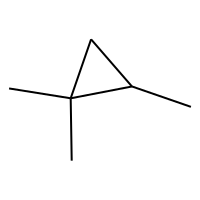
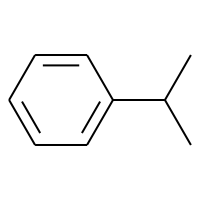
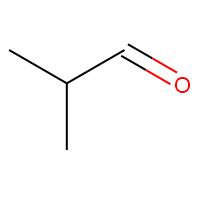
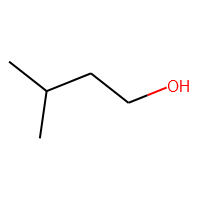
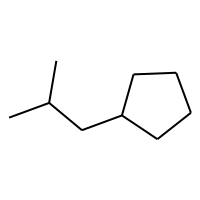
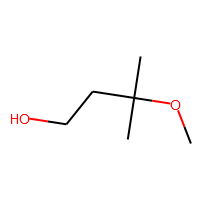
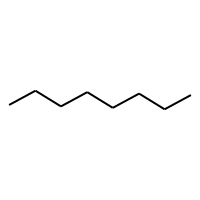
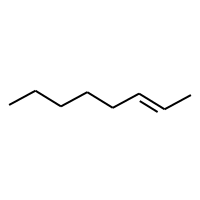
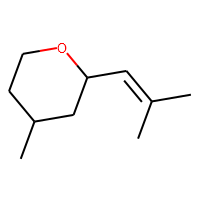
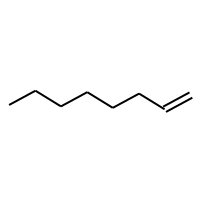
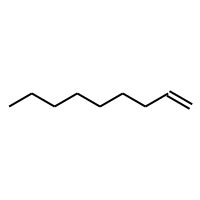
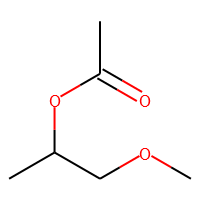
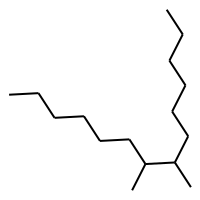
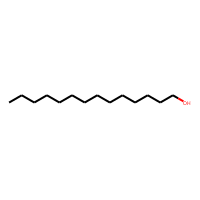
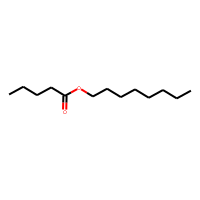
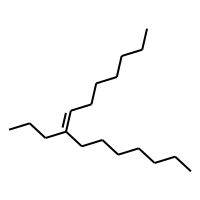
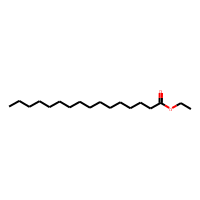
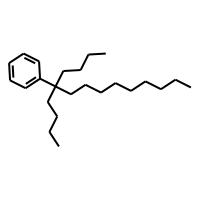
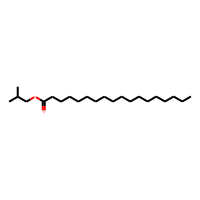
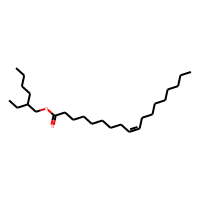

In [49]:
#table_error = table_error.drop(columns={"Molecule"})
table_error_sort = table_error.sort_values('Mod Leiden')
table_error_sort

In [50]:
print(table_error_sort.to_latex())

\begin{tabular}{lllrrrrl}
\toprule
{} &                                SMILES &                                       Name &  CN\_literature &  CN\_Predicted &  Mod Leiden &      Error &                                           Molecule \\
\midrule
239 &                          CC1(C(C1)C)C &                1,1,2-trimethylcyclopropane &          17.00 &     37.471041 &    0.166667 & -20.471041 &  <img data-content="rdkit/molecule" src="data:i... \\
225 &                         CC(C)c1ccccc1 &                           isopropylbenzene &          15.00 &      5.864828 &    0.288194 &   9.135172 &  <img data-content="rdkit/molecule" src="data:i... \\
681 &                              CC(C)C=O &               isobutanal(isobutyraldehyde) &          21.10 &     33.706437 &    0.300000 & -12.606437 &  <img data-content="rdkit/molecule" src="data:i... \\
255 &                              CC(C)CCO &                                isopentanol &          18.40 &     13.153909 &    0.300000

In [51]:



from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from matplotlib.cm import get_cmap
from collections import defaultdict
from xlwings import func, arg

colors = get_cmap('tab20')

@func
@arg('comms', numbers=int)
def draw_moleculeModules(smi, comms, molName):
    if type(comms) == str:
        comms=comms.strip().split(',')
        map_object = map(int, comms)
        comms = list(map_object)
    m=Chem.MolFromSmiles(smi)
    atomcomm=comms
    molatms=list(m.GetAtoms())
    #molbonds=list(m.GetBonds())
    #hit_ats=[]
    #hit_bonds=[]
    #hit_ats=[0,1,6]
    #hit_bonds=[0,5]
    athighlights2 = defaultdict(list)
    arads2 = {}
    bndhighlights2 = defaultdict(list)
    for bond in m.GetBonds():
        beginid=bond.GetBeginAtomIdx()
        endid=bond.GetEndAtomIdx()
        aid1=molatms[beginid].GetIdx()
        aid2=molatms[endid].GetIdx()
        bid=m.GetBondBetweenAtoms(aid1,aid2).GetIdx()
        #print('bondid:',bid)
        #print('s,t:', beginid, endid)
        if atomcomm[beginid] == atomcomm[endid]:
            atcomm=atomcomm[beginid]
    
            #hit_ats.append(aid1)
            #hit_ats.append(aid2)
            #print(atcomm)
            #print(colors(atcomm))
            #hit_bonds.append(bid)
            athighlights2[aid1].append(colors(atcomm))
            athighlights2[aid2].append(colors(atcomm))
            arads2[aid1] = 0.3
            arads2[aid2] = 0.3
            bndhighlights2[bid].append(colors(atcomm))
    
        else:
            bndhighlights2[bid].append((0.6,0.6,0.6))
    
    dm2=Draw.PrepareMolForDrawing(m)
    d3d = rdMolDraw2D.MolDraw2DCairo(400, 400)
    dos2 = d3d.drawOptions()
    dos2.atomHighlightsAreCircles = False
    dos2.fillHighlights=True
    #dos2.addAtomIndices=True
    #dos2.highlightBondWidthMultiplier=2
    
    d3d.DrawMoleculeWithHighlights(dm2, molName, dict(athighlights2), dict(bndhighlights2), arads2, {})
    #dict(bndhighlights2)
    d3d.FinishDrawing()
    outputf2 = d3d.WriteDrawingText(molName + '.png')
    
    return outputf2

@func
@arg('comms', numbers=int)
def comm_type(comms):
    if type(comms) == int:
        t='integer'
    elif type(comms) == str:
        t='string'
    elif type(comms) == list:
        t='list'
    else:
        t='other'
    return t

In [52]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D

import matplotlib.pyplot as plt
import mpld3
from mpld3 import plugins
mpld3.enable_notebook()

In [53]:
def moltosvg(mol,molSize=(225,75),kekulize=True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg.replace('svg:','')

In [54]:
smiles_list = ['CC','CCC','CCCC','O=C(C)Oc1ccccc1C(=O)O','c1ccccc1c1ccccc1']
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

data = range(len(mols))

svgs = [moltosvg(m) for m in mols]

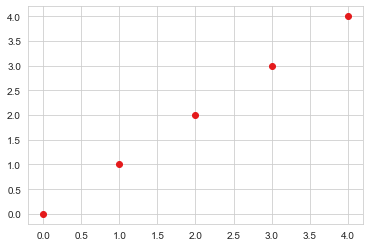

In [55]:
fig, ax = plt.subplots()
points = ax.scatter(data, data)
tooltip = plugins.PointHTMLTooltip(points, svgs)
plugins.connect(fig, tooltip)